# The HR diagram

In [1]:
import numpy as np
import scipy.stats as stats
import pylab as plt 
import math

We will work with a star catalogue of 240 stars described by the following information:

- Temperature (in Kelvin)
- Luminosity (L/Lo)
- Radius (R/Ro)
- Absolute magnitude (Mv)

We also have the following data for each star:

- Color (Red/Orange/Yellow/White/Blue)
- Spectral class ('A', 'B', 'F', 'G', 'K', 'M', 'O')
- Star type (Brown dwarf/Red dwarf/White dwarf/Main sequence/Supergiant/Hypergiant)

In [2]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

('stars.csv', <http.client.HTTPMessage at 0x1d7f4e9ccd0>)

In [3]:
import pandas as pd
df_stars = pd.read_csv("stars.csv")

In [4]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


There are 6 star types that are encoded in the 'Star type' column. These labels are currently encoded as strings which is practical for reading but not for computing. **Using scikit-learn, we will convert this column into integers by assigning a unique int value to each star type.**

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)

['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


We've seen this already last time. It is often grood practice to start with a statistical analysis of the dataset to answer the following questions:

- are there any missing values?
- are there NaNs in the data?

We can reproduce the HR diagram by plotting the scatter plot of our stars using the same variables in log-log-scale.

---
*Oss*

    Our data are already in logarithmic scale.
---

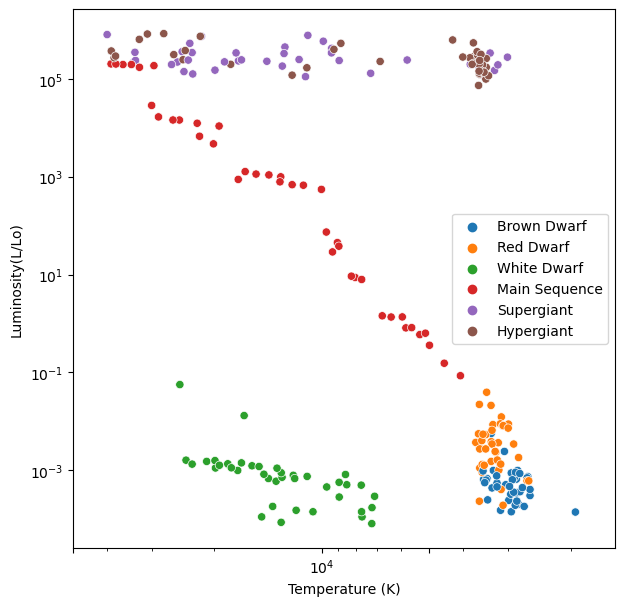

In [6]:
import seaborn as sns

fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

We find the same organization of stars in this 2D plane. Main Sequence stars and White Dwarves are fairly easy to isolate from the rest: a statistical model should be able to easily classify them. Based only on Luminosity and Temperature, Dwarf stars and Giant stars have higher intra-group variability: Supergiant and Hypergiant cover the same space (same for Brown and Red Dwarves). Additionnal variables might be needed to correctly identify the types of those stars.

### 1)

- Apply PCA to the dataset at your disposa (hint: don't use columns with labels, only those with real numbers).
- Project the dataset into the principal components, and do a scatter plot of the first two.

In [7]:
Temperature = []
for i in range(0, 239):
    Temperature.append(df_stars['Temperature (K)'][i])

In [8]:
X = df_stars.drop(['Star type','Star color', 'Spectral Class'], axis=1)
print(X)

     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)
0               3068          0.002400        0.1700                   16.12
1               3042          0.000500        0.1542                   16.60
2               2600          0.000300        0.1020                   18.70
3               2800          0.000200        0.1600                   16.65
4               1939          0.000138        0.1030                   20.06
..               ...               ...           ...                     ...
235            38940     374830.000000     1356.0000                   -9.93
236            30839     834042.000000     1194.0000                  -10.63
237             8829     537493.000000     1423.0000                  -10.73
238             9235     404940.000000     1112.0000                  -11.23
239            37882     294903.000000     1783.0000                   -7.80

[240 rows x 4 columns]


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X)
x_pca = pca.transform(X) # This is the eigenvalues

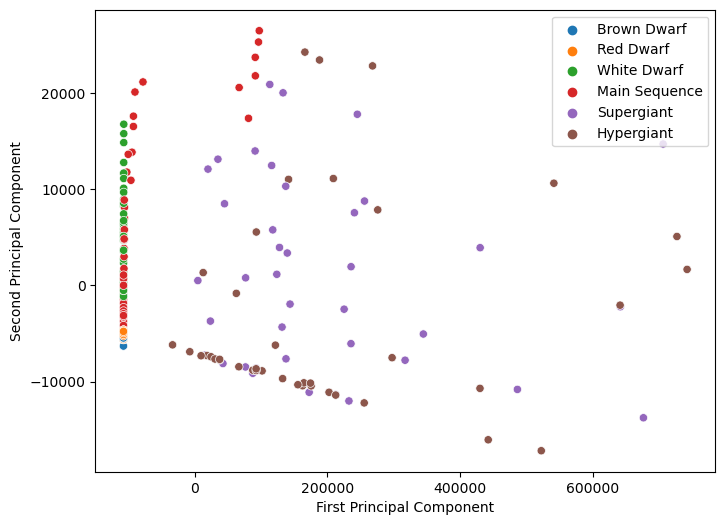

In [10]:
plt.figure(figsize=(8, 6))
 

sns.scatterplot(data=x_pca, x=x_pca[:,0], y=x_pca[:,1], hue=labels)

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
#plt.loglog()
plt.show()


The diagram above is not a good result. There is no way to distinguishes the different type of stars.

### 2)
Explore what happens if you rescale the data first.
- use standardization

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_stand = scaler.fit_transform(X)

pca = PCA()
projected_stars = pca.fit_transform(X_stand)

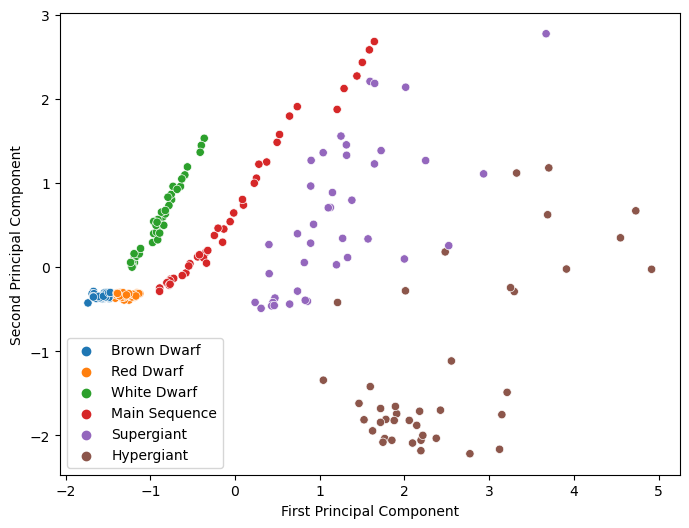

In [12]:
plt.figure(figsize=(8, 6))
 

sns.scatterplot(x=projected_stars[:,0], y=projected_stars[:,1], hue=labels)

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
#plt.loglog()
plt.show()

### 3)

I can repeat the PCA using the follow standardization methods:

    3_a) I can try an linear,affine transformation such that each dimension goes between -1 and 1

    3_b) Standardize your data such that each dimension has mean=0 and variance = 1.

##### 3_a)

In [13]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
X_train_minmax = min_max_scaler.fit_transform(X)
#X_train_minmax

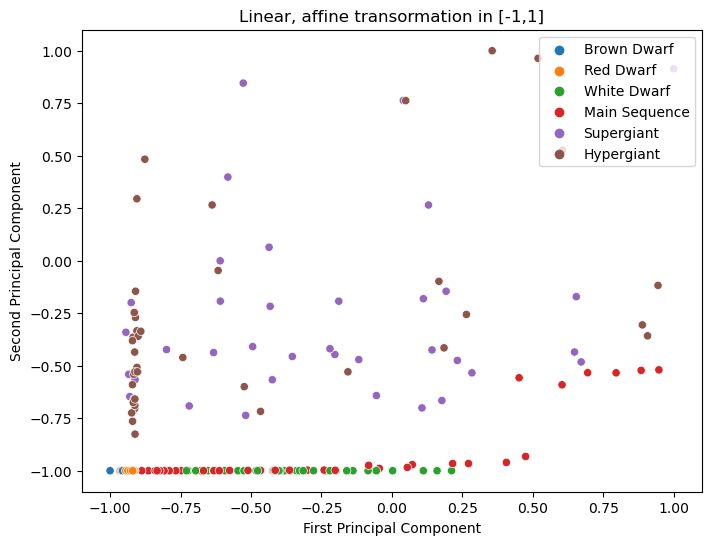

In [14]:
plt.figure(figsize=(8, 6))
 

sns.scatterplot(x=X_train_minmax[:,0], y=X_train_minmax[:,1], hue=labels)

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("Linear, affine transormation in [-1,1]")
#plt.loglog()
plt.show()

 The above diagram is not very good!

##### 3_b)

In [15]:
scaler = StandardScaler(with_mean = 0, with_std = 1)
X_stand_fixMean = scaler.fit_transform(X)

pca = PCA()
projected_stars = pca.fit_transform(X_stand_fixMean)

In [16]:
#print(projected_stars)
print(X_stand_fixMean)

[[ 3.21846201e-01  1.34034754e-08  3.29408061e-04  1.53369757e+00]
 [ 3.19118691e-01  2.79239071e-09  2.98792488e-04  1.57936599e+00]
 [ 2.72751018e-01  1.67543442e-09  1.97644837e-04  1.77916530e+00]
 [ 2.93731865e-01  1.11695628e-09  3.10031116e-04  1.58412312e+00]
 [ 2.03409317e-01  7.70699835e-10  1.99582531e-04  1.90855914e+00]
 [ 2.97928035e-01  3.63010792e-09  2.13146392e-04  1.61552015e+00]
 [ 2.76632475e-01  4.07689043e-09  2.46087199e-04  1.63835436e+00]
 [ 2.72751018e-01  2.23391257e-09  1.86018670e-04  1.65548001e+00]
 [ 2.77996230e-01  3.85349917e-09  2.13146392e-04  1.66023714e+00]
 [ 2.83241442e-01  1.00526065e-09  2.51900282e-04  1.52703760e+00]
 [ 3.77655256e-01  1.61958661e-08  9.88224183e-04  1.01707364e+00]
 [ 3.28245360e-01  6.81343332e-08  7.28766893e-04  1.12173042e+00]
 [ 3.28769881e-01  2.23391257e-09  3.79788117e-04  1.25683281e+00]
 [ 3.80592574e-01  3.07162978e-08  7.61513929e-04  9.97093709e-01]
 [ 2.77996230e-01  3.35086885e-09  2.71277227e-04  1.12096928e

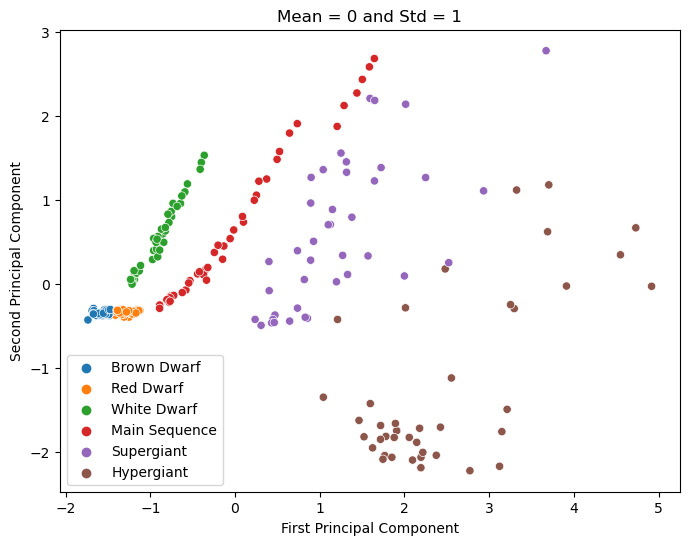

In [17]:
plt.figure(figsize=(8, 6))
 

sns.scatterplot(x=projected_stars[:,0], y=projected_stars[:,1], hue=labels)

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("Mean = 0 and Std = 1")
#plt.loglog()
plt.show()

<AxesSubplot:>

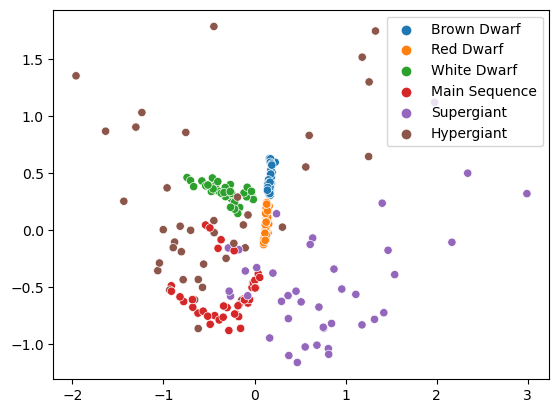

In [18]:
sns.scatterplot(x=projected_stars[:,2], y=projected_stars[:,3], hue=labels)


### 4)

How much variance is explained by those two components?

In [19]:
pca.explained_variance_ratio_

array([0.60357391, 0.23500784, 0.09329645, 0.0681218 ])

In [20]:
#print("components explain {:.3f} of the variance in the data.".format(pca.explained_variance_ratio_))
print("The first component explains {:.3f} of the variance in the data.".format(pca.explained_variance_ratio_[0]))
print("The first component explains {:.3f} of the variance in the data.".format(pca.explained_variance_ratio_[1]))
#print("All components explain {:.3f} of the variance in the data.".format(sum(pca.explained_variance_ratio_)))

The first component explains 0.604 of the variance in the data.
The first component explains 0.235 of the variance in the data.


How many components would we need to explain 99.5% of the variance?

In [21]:
for num_feats in np.arange(1,20, dtype = int):
    pca = PCA(n_components=num_feats)
    pca.fit(X_stand)
    if (sum(pca.explained_variance_ratio_)>0.995):
        break
print("{:d} features are needed to explain 99.5% of the variance".format(num_feats))

4 features are needed to explain 99.5% of the variance


*Oss*

    I casually choose n_features = 4. Thanks the above cell I am able to check the correct n_features.

# For later: come back to this assignment after lecture 20
Now run a supervised classification algorithm on this dataset.
Can you predict the stellar type? How well? Careful with overfitting of course.